## EP20BTECH11015 ASSIGNMENT 8

1. 
Calculate the angular two-point correlation function of galaxies (including
errors obtained by 10 bootstrap resamples) using subset of data from the

Blanco Cosmology Survey with r-band magnitude between 17 and 20, and
using 16 logarithmic-spaced angular bins from 1/60◦
to 1◦. Use a linear scale for Y-axis. 

Galaxies in Blanco Cosmology Survey have spread model > 0.002.
This data can be downloaded from http://www.iith.ac.in/~shantanud/BCS05hr_reduced.txt (30 points)

(Hint : Look at the astroML source code for Figure 6.17)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from astroML.utils.decorators import pickle_results
from astroML.correlation import bootstrap_two_point_angular

@pickle_results: using precomputed results from 'correlation_functions.pkl'


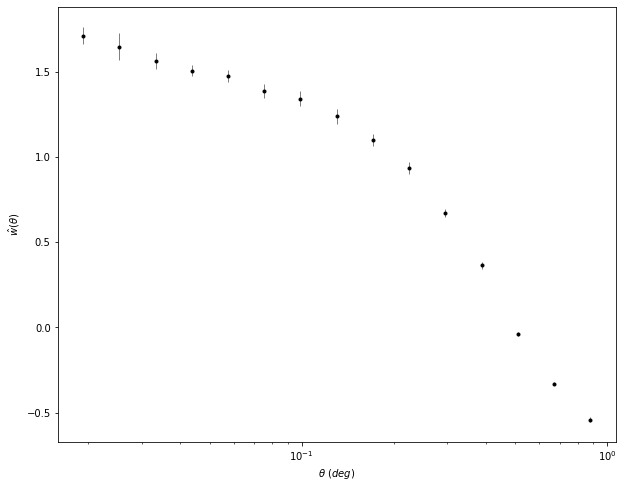

In [9]:
data = pd.read_csv('BCS05hr_reduced.txt', sep='\s+')
data = data[data['r-mag'] <= 20]
data = data[data['r-mag'] >= 17]
bins = np.logspace(-np.log10(60), 0, 16)

@pickle_results("correlation_functions.pkl")
def compute_results(Nbins=16, Nbootstraps=10,  method='landy-szalay', rseed=0):
    np.random.seed(rseed)

    results = [bins]
    # for D in [data_red, data_blue]:
    results += bootstrap_two_point_angular(data['#RA'],data['DEC'],bins=bins,method=method,Nbootstraps=Nbootstraps)

    return results

(bins, corr, corr_err, bootstraps) = compute_results()

bin_centers = 0.5 * (bins[1:] + bins[:-1])
plt.figure(figsize=(10, 8))
plt.errorbar(bin_centers, corr, corr_err, fmt='.k', ecolor='gray', lw=1)
plt.xlabel(r'$\theta\ (deg)$')
plt.ylabel(r'$\hat{w}(\theta)$')
plt.xscale('log')
plt.show()